In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

# TODOs (from 09.06.2020)

1. Strip away the non-useful functions
2. Document the remaining functions
3. Move the remaining functions to modules
4. Test the modules
5. Clean up this NB

# Introduction: movement analysis

From a sequence of signaling events, _eg_ GPS measurements, determine locations where the user remains for a significant duration of time, called "stays". For each of these, there should be a beginning and end, as well as a location. 

Generally, this is meant for movement on the surface of the earth, but for present purposes, it is easiest to illustrate in one spatial dimension "1D"; all of the problems and strategies can be generalized to 2D as needed.

**Note** the signaling events for a given user, form a set $\mathcal{E} :=  \{e_i = (\mathbf{x}_i, t_i), i=[0,N-1] \; | \; t_{i+1}>t_i\}$

In [5]:
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

In [6]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [7]:
eps = 0.25

## Testing the box method

Once the box (width is provided by the spatial tolerance) is positioned in a good way (_ie_ the centroid), extending the box forwards or backwards in time makes no change to the _score_ of the box.

Here, the score could be something like the number of points, the std/MSE; whatever it is, it should be saturated at some point and extending the box makes no difference, meaning that something converges which provides a stopping criterion. 

In [8]:
rand_range = lambda size, max_, min_: (max_-min_)*np.random.random_sample(size=size) + min_

In [9]:
from synthetic_data.trajectory import get_stay
from synthetic_data.trajectory import get_journey_path, get_segments
from synthetic_data.masking import get_mask_with_duplicates
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays, get_stay_indices
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr

In [10]:
from synthetic_data.trajectory_class import get_trajectory

In [11]:
segs_plot_kwargs = {'linestyle':'--', 'marker':'o', 'color':'k', 'linewidth':4.0, 'markerfacecolor':'w', 'markersize':6.0, 'markeredgewidth':2.0}

In [12]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [13]:
def get_rand_stays():
    

    nr_stays = np.random.randint(10)
    stay_time_bounds = np.concatenate((np.array([0]),rand_range(2*nr_stays, 24, 0),np.array([24])))
    stay_time_bounds = np.sort(stay_time_bounds)
    stay_xlocs = rand_range(nr_stays+1, 2, - 2.0)

    time_thresh = 1/6 # 10 mins

    new_stay_time_bounds = []
    new_stay_xlocs = []
    for n in range(len(stay_xlocs)):

        nn = 2*n
        b0,b1 = stay_time_bounds[nn],stay_time_bounds[nn+1]

        if b1-b0 > time_thresh: 

            new_stay_time_bounds.extend([b0,b1])
            new_stay_xlocs.append(stay_xlocs[n])

    stays = []
    for n in range(int(len(new_stay_time_bounds)/2)):
        nn = 2*n
        stay = get_stay(new_stay_time_bounds[nn], new_stay_time_bounds[nn+1], new_stay_xlocs[n])
        stays.append(stay)    

    return stays

In [14]:
def get_rand_traj():

    dsec = 1/3600.0
    time = np.arange(0,24,dsec)

    event_frac = rand_range(1,0.01,0.001)[0]
    duplicate_frac = rand_range(1,0.3,0.05)[0]

    configs = {
        'threshold':0.5,
        'event_frac':event_frac,
        'duplicate_frac':duplicate_frac,    
        'noise_min':0.02,
        'noise_max':0.15
    }

    stays  = get_rand_stays()

    time_arr, raw_arr, noise_arr = get_trajectory(stays, time, configs)
    segments = get_segments(time, stays, threshold=0.5)
    
    return time_arr, raw_arr, noise_arr, segments

In [18]:
time_arr, raw_arr, noise_arr, segments = get_rand_traj()
new_stays = get_adjusted_stays(segments, time_arr)
new_t_segs, new_x_segs = get_stay_segs(new_stays)

/home/sandm/Notebooks/stay_classification/src/synthetic_data/trajectory.py:162: UserWarning: the distance between the consecutive locations is within the threshold 0.5
  warnings.warn(f"the distance between the consecutive locations is within the threshold {threshold}")


In [15]:
from numpy.linalg import lstsq

In [68]:
import pickle
from datetime import datetime

In [16]:
ramp = lambda u: np.maximum( u, 0 )
step = lambda u: ( u > 0 ).astype(float)

In [75]:
stays_tag = int((new_x_segs.size)/3)
date_tag = datetime.today().strftime('%Y%m%d')
notes = 'unconverging_example'
trajectory_tag = f"{date_tag}_trajectory_{stays_tag}stays__{notes}"

In [74]:
trajectory = {}
trajectory['segments'] = segments
trajectory['time_arr'] = time_arr
trajectory['raw_locs_arr'] = raw_arr
trajectory['nse_locs_arr'] = noise_arr

In [76]:
pickle.dump( trajectory, open( trajectory_tag, "wb" ) )
#trajectory = pickle.load( open( "20200625_trajectory_8stays__adjusted.pkl", "rb" ) )

in loop 1
in loop 2
in loop 3
in loop 4
in loop 5
in loop 6
in loop 7
in loop 8
in loop 9
in loop 10
in loop 11
in loop 12
in loop 13
in loop 14
in loop 15
in loop 16
in loop 17
in loop 18
in loop 19
in loop 20
in loop 21
in loop 22
in loop 23
in loop 24
in loop 25
in loop 26
in loop 27
in loop 28
in loop 29
in loop 30
in loop 31
in loop 32
in loop 33
in loop 34
in loop 35
in loop 36
in loop 37
in loop 38
in loop 39
in loop 40
in loop 41
in loop 42
in loop 43
in loop 44
in loop 45
in loop 46
in loop 47
in loop 48
in loop 49
in loop 50
in loop 51
in loop 52
in loop 53
in loop 54
in loop 55
in loop 56
in loop 57
in loop 58
in loop 59
in loop 60
in loop 61
in loop 62
in loop 63
in loop 64
in loop 65
in loop 66
in loop 67
in loop 68
in loop 69
in loop 70
in loop 71
in loop 72
in loop 73
in loop 74
in loop 75
in loop 76
in loop 77
in loop 78
in loop 79
in loop 80
in loop 81
in loop 82
in loop 83
in loop 84
in loop 85
in loop 86
in loop 87
in loop 88
in loop 89
in loop 90
in loop 91
in loop 

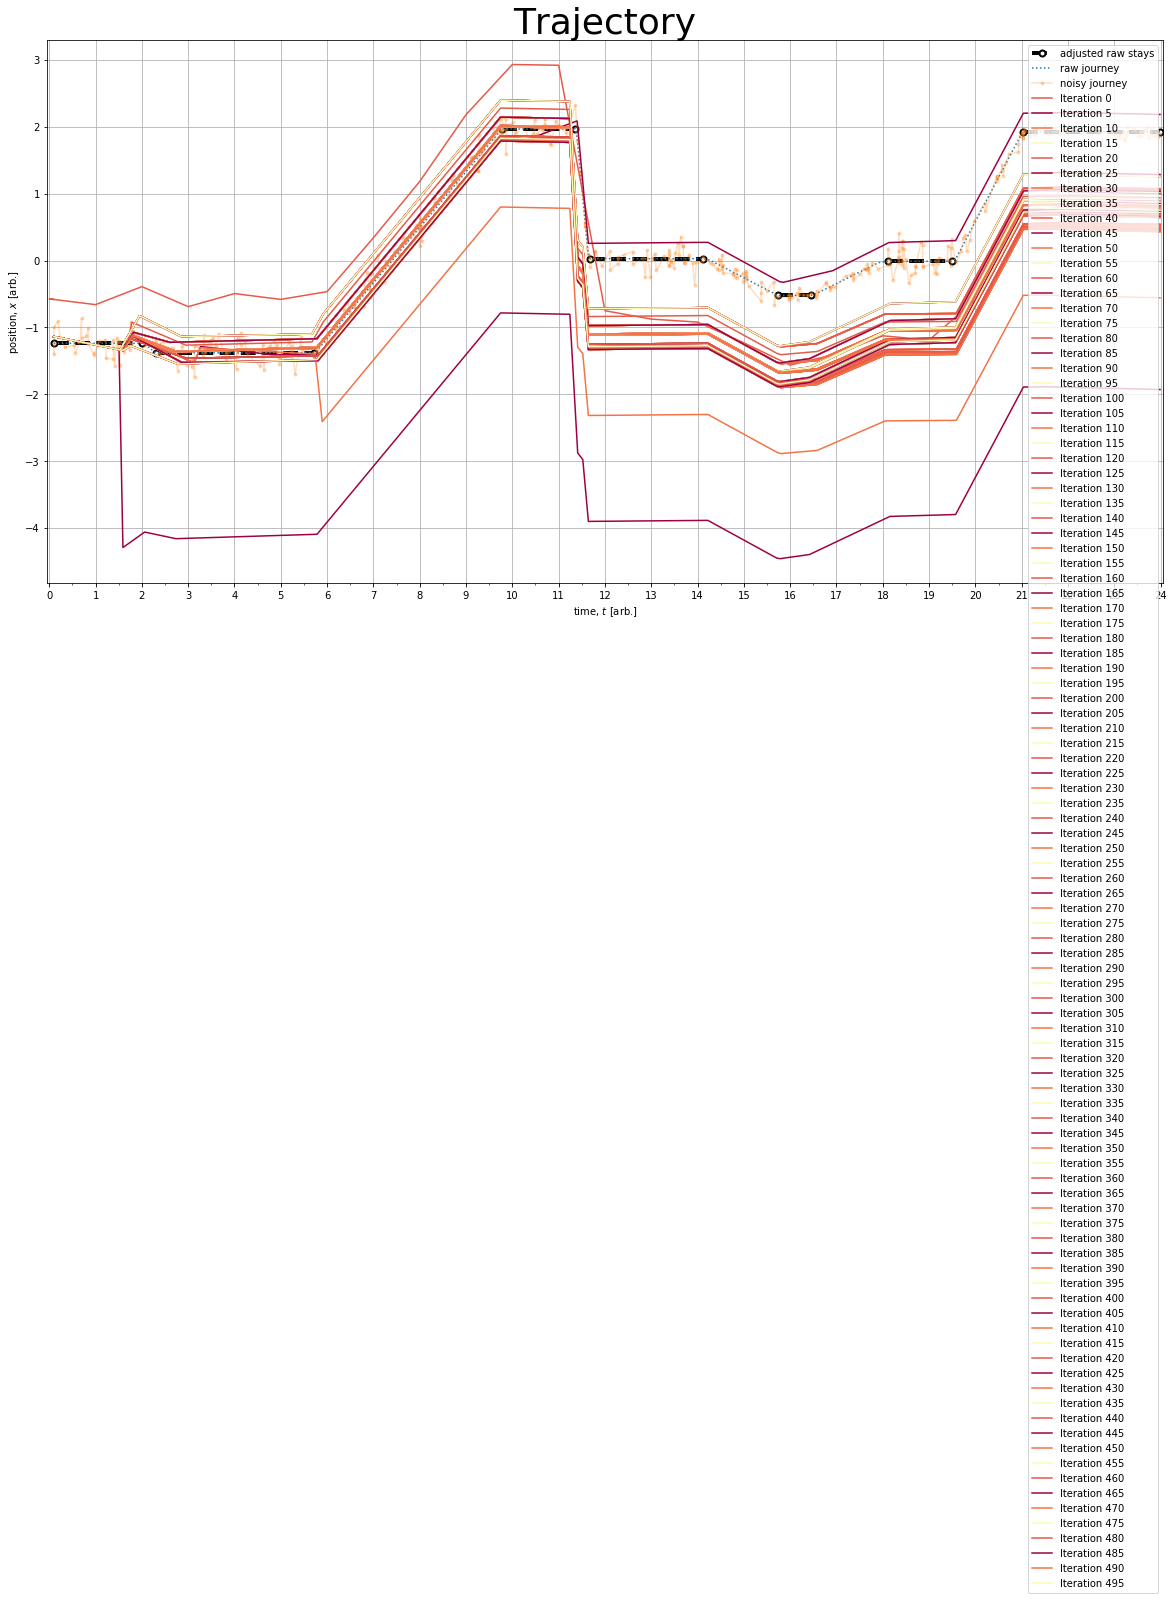

In [60]:
plt.figure(figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')

plt.plot(new_t_segs, new_x_segs, **segs_plot_kwargs, label='adjusted raw stays')
plt.plot(time_arr, raw_arr, ':', label='raw journey')
plt.plot(time_arr, noise_arr, '.-', label='noisy journey', alpha=0.25)

# hyperparam
nIterationMax = 500

# Sorting the breaks
#breakpoints = np.sort( np.array(breakpoints0) )
breakpoints = np.arange(0,24,1)

# time_arrDiffs
dt = np.min( np.diff(np.unique( time_arr)) )

ones = np.ones_like(time_arr)

yyysolution_last = noise_arr

all_breakpoints = []

loops1 = []
cycle = []
last_len = 0
set_len = 0
# loop through the whole data set
for i in range( nIterationMax ):
    
    #print(yyysolution_last.shape)
    
    ones = np.ones_like(time_arr)
    
    # Linear regression:  solve A*p = Y
    Rk = [ramp( time_arr - xk ) for xk in breakpoints ]
    Sk = [step( time_arr - xk ) for xk in breakpoints ]
    A = np.array([ ones, time_arr ] + Rk + Sk )
    p =  lstsq(A.transpose(), noise_arr, rcond=None)[0] 

    # Parameters identification:
    a, b = p[0:2]
    ck = p[ 2:2+len(breakpoints) ]
    dk = p[ 2+len(breakpoints): ]

    # Estimation of the next break-points:
    newBreakpoints = breakpoints - dk/ck 

    #print(np.max(np.abs(newBreakpoints - breakpoints)),dt/5, dt)
    # Stop condition
    if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
        print('Stopping criterion')
        #break
    
        
    # Compute the final segmented fit:
    xxxsolution = np.insert( np.append( breakpoints, max(time_arr) ), 0, min(time_arr) )
    ones =  np.ones_like(xxxsolution) 
    Rk = [ c*ramp( xxxsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

    yyysolution = a*ones + b*xxxsolution + np.sum( Rk, axis=0 )

    # Compute the final segmented fit:
    ones_model =  np.ones_like(time_arr) 
    Rk_model = [ c*ramp( time_arr - x0 ) for x0, c in zip(breakpoints, ck) ]

    yyysolution_model = a*ones_model + b*time_arr + np.sum( Rk_model, axis=0 )
    
    norm_err = np.linalg.norm(yyysolution_model-yyysolution_last)
    round_norm_err = round(norm_err,5)
    if round_norm_err in loops1:

        cycle.append(round_norm_err)
        set_len = len(list(set(cycle)))
        consec = True
        print("in loop", set_len)        
    else:    
        loops1.append(round_norm_err)
        consec = False
    
    
    
    
    #print(norm_err, yyysolution.size, breakpoints.size )
    if np.linalg.norm(yyysolution_model-yyysolution_last) < 0.01:
        print(f'{i}: Stopping criterion #2')
        
    #print(yyysolution.shape)
    if i%5==0:
        plt.plot(xxxsolution, yyysolution, color=colors[i%len(colors)] , label=f'Iteration {i}')
    
    breakpoints = newBreakpoints
    breakpoints = breakpoints[(breakpoints > time_arr.min()) & (breakpoints < time_arr.max())]
    breakpoints = np.sort( breakpoints )
    all_breakpoints.append(breakpoints)
    yyysolution_last = yyysolution_model
    
    if len(cycle) > 0:
        if (last_len == set_len) & consec & (round_norm_err == min(cycle)):
            break
    else:
        last_len = set_len
    

plt.legend();

plt.xlabel(r'time, $t$ [arb.]')
plt.ylabel(r'position, $x$ [arb.]')

ymin = noise_arr.min()-1*eps
ymax = noise_arr.max()+1*eps
#plt.ylim(ymin, ymax)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

plt.xlim(-0.05, 24.05)
#plt.xlim(-0.1, 19.1
#plt.xlim(15.1, 19.1)

plt.title('Trajectory', fontsize=36)
plt.grid(visible=True);    

In [61]:
(len(all_breakpoints),all_breakpoints[-1].size)

(500, 21)

In [62]:
all_breakpoints[0]

array([ 1.50413077,  1.9246606 ,  2.94195132,  3.80164737,  4.98960558,
        5.8018437 ,  6.18327122,  8.74633063,  8.81272119,  9.77535501,
       11.25046315, 11.38551192, 11.75225171, 14.09881262, 14.18374918,
       15.90271017, 16.34243036, 18.2679987 , 19.2390766 , 19.70580585,
       21.03068025, 22.24770133, 23.33342169])

In [63]:
plot_all_breakpoints[0,:]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [64]:
plot_all_breakpoints = np.empty(shape=(len(all_breakpoints),all_breakpoints[-1].size))
plot_all_breakpoints[:,:] = np.NaN

In [65]:
for n,row in enumerate(all_breakpoints):
    #print(row)
    if row.size == all_breakpoints[-1].size:
        plot_all_breakpoints[n,:] = row

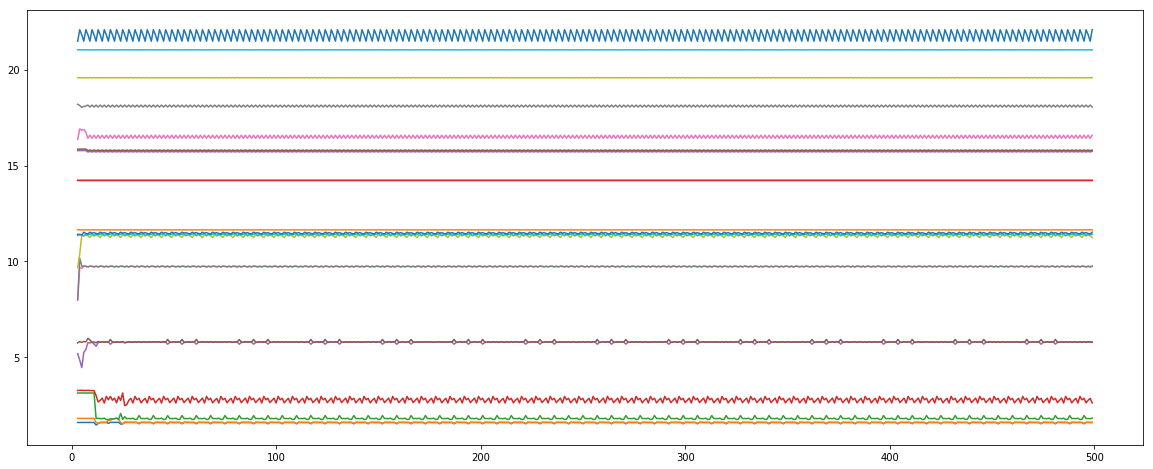

In [66]:
plt.figure(figsize=[20,8])
plt.plot(plot_all_breakpoints);

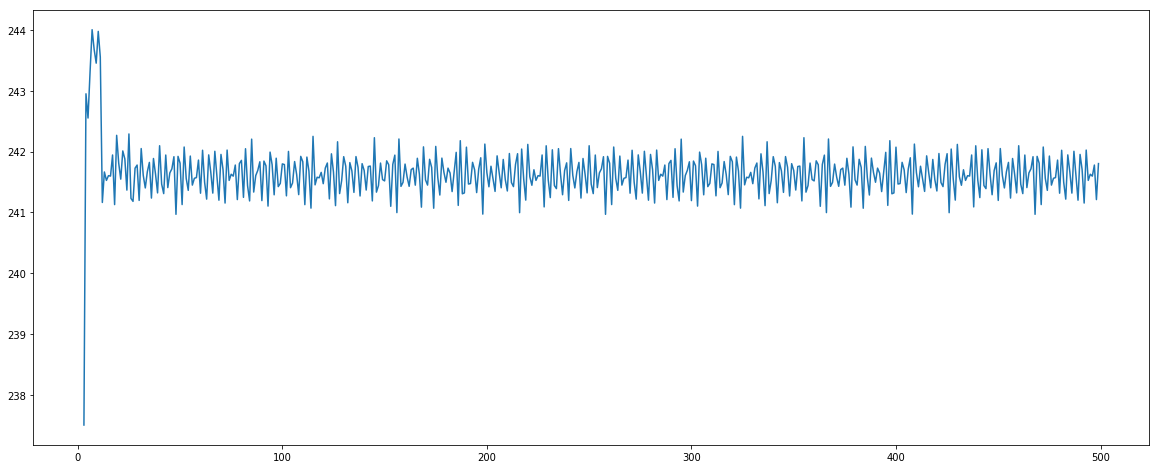

In [67]:
plt.figure(figsize=[20,8])
plt.plot(np.sum(plot_all_breakpoints, axis=1));

**Note** sometimes the errors don't converge; make the breakpoints do?

### Eval

In [ ]:
calc_slope = lambda x1,y1,x2,y2: (y2-y1)/(x2-x1)

In [ ]:
final_pairs = []
for n in range(0,len(yyysolution)-1,1):
    
    slope = calc_slope(xxxsolution[n],yyysolution[n],xxxsolution[n+1],yyysolution[n+1])
    
    print(slope)
    
    mask = np.where((time_arr >= xxxsolution[n]) & (time_arr < xxxsolution[n+1]))
    
    if abs(slope) < 0.1:
        final_pairs.append((mask[0][0],mask[0][-1]))

In [ ]:
from synthetic_data.trajectory import get_stay_indices

In [ ]:
true_indices = get_stay_indices(new_stays, time_arr)

In [ ]:
true_labels = np.zeros(time_arr.shape)

for pair in true_indices:
    true_labels[pair[0]:pair[1]+1] = 1

np.sum(true_labels), true_labels.size-np.sum(true_labels), true_labels.size, np.sum(true_labels)/true_labels.size

In [ ]:
pred_labels = np.zeros(time_arr.shape)
for pair in final_pairs:
    pred_labels[pair[0]:pair[1]+1] = 1

In [ ]:
np.sum(pred_labels), pred_labels.size-np.sum(pred_labels), pred_labels.size, np.sum(pred_labels)/pred_labels.size

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

confusion_matrix(true_labels, pred_labels)

In [ ]:
precision_score(true_labels, pred_labels), recall_score(true_labels, pred_labels), 

In [ ]:
fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(2,1,1)

ax1.plot(new_t_segs, new_x_segs, **segs_plot_kwargs, label='adjusted raw stays')
ax1.plot(time_arr, raw_arr, ':', label='raw journey')
ax1.plot(time_arr, noise_arr, '.-', label='noisy journey', alpha=0.5)
        
ax1.plot(xxxsolution, yyysolution, '--', label=f'Iteration {i}')
        

ax1.legend();

ax1.set_xlabel(r'time, $t$ [arb.]')
ax1.set_ylabel(r'position, $x$ [arb.]')

ymin = noise_arr.min()-1*eps
ymax = noise_arr.max()+1*eps
#plt.ylim(ymin, ymax)

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))

ax1.set_xlim(-0.05, 24.05)
#plt.xlim(-0.1, 19.1
#plt.xlim(15.1, 19.1)

ax1.set_title('Trajectory', fontsize=36)
ax1.grid(visible=True);    

ax2 = fig.add_subplot(2,1,2, adjustable='box', aspect=1.5, sharex=ax1)

ax2.plot(time_arr, true_labels, 'X:', markersize=8, label='True')
ax2.plot(time_arr, pred_labels, '.', label='Pred.')
ax2.set_ylim(-0.2,1.2)
ax2.set_xlim(-0.5,24.5)

'''ax = plt.gca()

ax2.xaxis.set_major_locator(MultipleLocator(1))

#ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
'''
plt.xlabel(r'time, $t$ [arb.]')

ax2.set_yticks([0,1])
ax2.set_yticklabels(['travel', 'stay'])
ax2.legend()
#ax2.set_title('Trajectory', fontsize=36)
ax2.grid(visible=True);    

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
datetag = datetime.today().strftime('%Y%m%d')

In [ ]:
### pickle.dump( trajectory, open( trajectory_tag, "wb" ) )
#trajectory = pickle.load( open( "20200625_trajectory_8stays__adjusted.pkl", "rb" ) )

In [ ]:
prec_scores, reca_scores = [], []

nnnn = 0

while nnnn < 1:
    
    if nnnn%10 == 0: print(nnnn)
    try:
        
        # Create data
        time_arr, raw_arr, noise_arr, segments = get_rand_traj()
        new_stays = get_adjusted_stays(segments, time_arr)
        new_t_segs, new_x_segs = get_stay_segs(new_stays) 
        
        min_t, max_t = time_sub.min(), time_sub.max()

        '''fig, ax = plt.subplots(1,1,figsize=(22,10))

        # The adjusted raw-stays
        plt.plot(new_t_segs, new_x_segs, **segs_plot_kwargs, label='adjusted raw stays')
        plt.plot(time_sub, noise_journey_sub, '.-', color='gray', label='noisy journey', alpha=0.25)
        plt.plot(time_sub, raw_journey_sub, ':', color='C0', label='raw journey')
        '''
        
        # hyperparam
        nIterationMax = 100

        # Sorting the breaks
        #breakpoints = np.sort( np.array(breakpoints0) )
        breakpoints = np.arange(0,24,1)

        # time_arrDiffs
        dt = np.min( np.diff(np.unique( time_arr)) )

        ones = np.ones_like(time_arr)

        yyysolution_last = noise_arr


        loops1 = []
        cycle = []
        last_len = 0
        set_len = 0
        # loop through the whole data set
        for i in range( nIterationMax ):

            #print(yyysolution_last.shape)

            ones = np.ones_like(time_arr)

            # Linear regression:  solve A*p = Y
            Rk = [ramp( time_arr - xk ) for xk in breakpoints ]
            Sk = [step( time_arr - xk ) for xk in breakpoints ]
            A = np.array([ ones, time_arr ] + Rk + Sk )
            p =  lstsq(A.transpose(), noise_arr, rcond=None)[0] 

            # Parameters identification:
            a, b = p[0:2]
            ck = p[ 2:2+len(breakpoints) ]
            dk = p[ 2+len(breakpoints): ]

            # Estimation of the next break-points:
            newBreakpoints = breakpoints - dk/ck 

            #print(np.max(np.abs(newBreakpoints - breakpoints)),dt/5, dt)
            # Stop condition
            #if np.max(np.abs(newBreakpoints - breakpoints)) < dt/5:
            #    print('Stopping criterion')
            #    #break


            # Compute the final segmented fit:
            xxxsolution = np.insert( np.append( breakpoints, max(time_arr) ), 0, min(time_arr) )
            ones =  np.ones_like(xxxsolution) 
            Rk = [ c*ramp( xxxsolution - x0 ) for x0, c in zip(breakpoints, ck) ]

            yyysolution = a*ones + b*xxxsolution + np.sum( Rk, axis=0 )

            # Compute the final segmented fit:
            ones_model =  np.ones_like(time_arr) 
            Rk_model = [ c*ramp( time_arr - x0 ) for x0, c in zip(breakpoints, ck) ]

            yyysolution_model = a*ones_model + b*time_arr + np.sum( Rk_model, axis=0 )

            norm_err = np.linalg.norm(yyysolution_model-yyysolution_last)
            round_norm_err = round(norm_err,5)
            if round_norm_err in loops1:

                cycle.append(round_norm_err)
                set_len = len(list(set(cycle)))
                consec = True
                #print("in loop", set_len)        
            else:    
                loops1.append(round_norm_err)
                consec = False

            #print(norm_err, yyysolution.size, breakpoints.size )
            #if np.linalg.norm(yyysolution_model-yyysolution_last) < 0.01:
            #    print(f'{i}: Stopping criterion #2')

            breakpoints = newBreakpoints
            breakpoints = breakpoints[(breakpoints > time_arr.min()) & (breakpoints < time_arr.max())]
            breakpoints = np.sort( breakpoints )

            yyysolution_last = yyysolution_model

            if len(cycle) > 0:
                if (last_len == set_len) & consec & (round_norm_err == min(cycle)):
                    print(f'{i}: Stopping criterion #3')
                    break
            else:
                last_len = set_len

                
        #=======================================================                
        '''plt.plot(xxxsolution, yyysolution, color="C5" , label='Piece. lin.')

        plt.legend();

        plt.xlabel(r'time, $t$ [arb.]')
        plt.ylabel(r'position, $x$ [arb.]')

        ymin = noise_journey_sub.min()-1*eps
        ymax = noise_journey_sub.max()+1*eps
        #plt.ylim(ymin, ymax)

        ax = plt.gca()
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))

        plt.xlim(-0.05, 24.05)
        #plt.xlim(-0.1, 19.1
        #plt.xlim(15.1, 19.1)
        plt.grid(visible=True)'''
        #=======================================================
        
        #print(len(yyysolution))
        # Calc slope to identify 
        calc_slope = lambda x1,y1,x2,y2: (y2-y1)/(x2-x1)
        final_pairs = []
        for n in range(0,len(yyysolution)-1,1):

            slope = calc_slope(xxxsolution[n],yyysolution[n],xxxsolution[n+1],yyysolution[n+1])

            #print(slope)

            mask = np.where((time_arr >= xxxsolution[n]) & (time_arr < xxxsolution[n+1]))

            if abs(slope) < 0.1:
                final_pairs.append((mask[0][0],mask[0][-1]))

        true_indices = get_stay_indices(new_stays, time_arr)
        true_labels = np.zeros(time_arr.shape)

        for pair in true_indices:
            true_labels[pair[0]:pair[1]+1] = 1

        pred_labels = np.zeros(time_arr.shape)
        for pair in final_pairs:
            pred_labels[pair[0]:pair[1]+1] = 1


        prec = precision_score(true_labels, pred_labels)
        rec  = recall_score(true_labels, pred_labels)
        
        '''plt.title(f'Trajectory, prec.: {prec}, rec. {rec}', fontsize=36)
        plt.savefig(trajectory_tag+'.png')'''
        #=======================================================            
            
        #print(precision_score(true_labels, pred_labels))
        #confusion_matrix(true_labels, pred_labels)
        prec_scores.append(prec)
        reca_scores.append(rec)
        
        nnnn+=1
    except:
        pass
    


In [81]:
preciss = np.array(prec_scores)
recalls = np.array(reca_scores)

#print(preciss.mean(), recalls.mean())
recaprec = np.hstack([recalls.reshape(-1,1),preciss.reshape(-1,1)])
recaprec = recaprec[recaprec[:,0].argsort()]

In [82]:
preciss.mean(), (1-recalls).mean()

(0.8732896228971392, 0.14475514481781354)

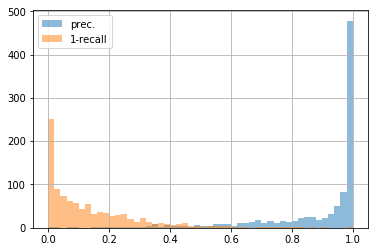

In [83]:
binw = 0.02
bins=np.arange(0,1.0+binw,binw)
_ = plt.hist(preciss, bins=bins, alpha=0.5, label='prec.')
_ = plt.hist(1-recalls, bins=bins, alpha=0.5, label='1-recall')
plt.legend()
plt.grid();

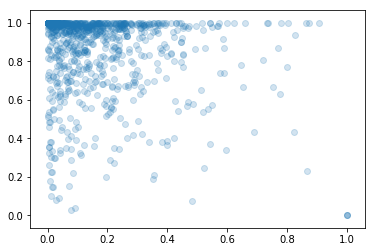

In [85]:
plt.scatter(1.-recaprec[:,0], recaprec[:,1], alpha=0.2)